In [4]:
import matplotlib.pyplot as plt
from numpy.random import *
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
from Process import *

In [2]:
class RandomVar:
    
    def mean():
        pass
    def sample():
        pass

## Chines restaurant process (for when base dist is uniform in N?)

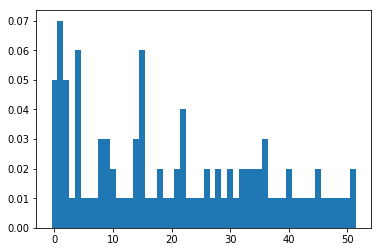

[[0, 2, 30, 44, 90], [1, 5, 31, 34, 51, 66, 95], [3, 28, 38, 43, 53], [4], [6, 13, 23, 68, 73, 93], [7], [8], [9], [10, 45, 62], [11, 63, 92], [12, 75], [14], [15], [16], [17, 72, 83], [18, 21, 52, 70, 74, 99], [19], [20], [22, 87], [24], [25], [26, 27], [29, 54, 81, 85], [32], [33], [35], [36, 59], [37], [39, 55], [40], [41, 71], [42], [46, 94], [47, 56], [48, 84], [49, 79], [50, 69, 96], [57], [58], [60], [61, 78], [64], [65], [67], [76], [77, 91], [80], [82], [86], [88], [89], [97, 98]]
[0.05, 0.07, 0.05, 0.01, 0.06, 0.01, 0.01, 0.01, 0.03, 0.03, 0.02, 0.01, 0.01, 0.01, 0.03, 0.06, 0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.04, 0.01, 0.01, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02]


In [ ]:
def crp(ap=10,num=100):
    """chinese restaurant process (equivalent representation of Dirichlet)
        param: ap: alpha, its maginitude rises inversely with rich gets richer"""
    
#     num = 100
#     ap = 10
    # first customer goes to first table
    tables = [[0]]
    size = [1]
    
    for n in range(1,num):
        # compute categorical distribution for customer assignment
        cat = []
        denom = n+ap #n+1-1+ap
        for i in range(len(size)):
            cat.append(size[i] / denom)
        # new table probability
        cat.append(ap / denom)
        assert(sum(cat) - 1 < 0.0001)
        
        # draw next table
        table = choice(len(cat), p=cat)
        
        # new table
        if table == len(cat) - 1:
            tables.append([n])
            size.append(1)
        # old table
        else:
            tables[table].append(n)
            size[table] += 1
           
    # return support and prob
    return np.arange(len(size)), [s/num for s in size], tables
_,p,tables = crp(ap=50)
plt.figure()
plt.bar(range(len(p)), p,width=1)
plt.show()
print(tables)
print(p)

    

{3.375598110829265: [0], 1.7378223975316502: [1], -2.9167954729429777: [2, 56, 84], 0.34003381848618064: [3], 0.10125982912753795: [4], 7.774121956888677: [5, 17, 90], 4.051449335734161: [6, 7, 62], 3.199442614609845: [8], 3.517918668429122: [9, 20, 26, 63, 83, 87], 4.047202470522988: [10, 70], 3.693753494145938: [11], 8.066326662957799: [12, 74], 7.089854533805713: [13], -4.506485257740474: [14], -4.441353004601384: [15], -1.2557034163761216: [16, 21, 42, 49], 2.9387318607181867: [18, 58, 59], 2.5162627926255516: [19, 47, 61], 1.8741114719896712: [22], -0.057987405718859186: [23, 25, 28, 32, 52, 64, 75, 85], -0.2685586932455917: [24], 2.5774560946665455: [27], 2.4701279516957313: [29], 1.9645381527669876: [30, 37, 40, 45], 5.542949428322258: [31], 1.2387614822938207: [33, 71], 0.8573783304908951: [34], 1.5775637964269236: [35], 2.5263599823521568: [36], 3.1780326861118713: [38], -2.057412445838846: [39], -0.835024639448203: [41, 81], 0.7322844503604138: [43], 2.103425906637353: [44], 

/home/drproduck/miniconda3/envs/sage/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


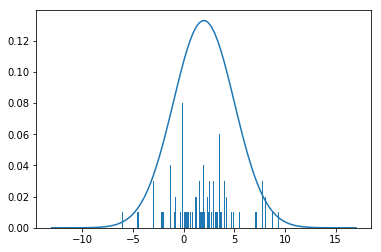

In [4]:
def DP(mu, sg, num, ap):
    """dirichlet process with Gaussian base distribution"""
    tables = dict()
    #first value drawn from G
    nval = normal(mu,sg)
    tables[nval] = [0]
    
    for n in range(1,num):
        # compute categorical distribution for customer assignment
        cat = []
        denom = n+ap #n+1-1+ap
        
        key = []
        for k,v in tables.items():
            key.append(k)
            cat.append(len(v) / denom)
            
        # new table probability
        cat.append(ap / denom)
        assert(sum(cat) - 1 < 0.0001)
        
        # draw from past values or draw new value from G?
        table = choice(len(cat), p=cat)
        
        # new value from G
        if table == len(cat) - 1:
            nval = normal(mu,sg)
            tables[nval] = [n]
            
        # past values
        else:
            tables[key[table]].append(n)
           
    return tables
    
tables = DP(2,3,100,50)

print(tables)
n = sum([len(v) for v in tables.values()])
plt.figure()
plt.bar(tables.keys(), [len(v)/n for v in tables.values()], width=0.1)
sd = math.sqrt(3)
mu = 2; sd = 3
x = np.linspace(mu - 5*sd, mu + 5*sd, 100)
plt.plot(x,mlab.normpdf(x, mu, sd))
plt.show()

<BarContainer object of 100 artists>

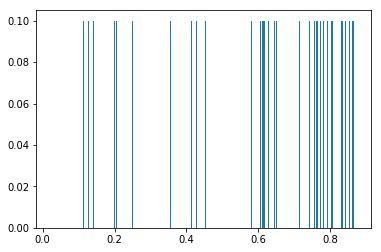

In [5]:
# stick breaking
def GEM(ap,K):
    """Griffiths-Engen-McCloskey"""
    
    #sample from Beta(1,ap)
    bt = beta(1,ap,K)
    #first sample is v_0
    sample = [bt[0]]
    pd = (1-bt[0])
    for i in range(1,K):
        sample.append(bt[i]*pd)
        pd *= (1-bt[i])
    return sample
def stickBreaking(ap,K=1000):
    """table in N just like Chinese Restaurant"""
    support = np.arange(K)
    p = GEM(ap,K)
    return np.array(support), np.array(p)
plt.figure()
sample = GEM(50, 100)
plt.bar(np.cumsum(sample),0.1,width=0.001)



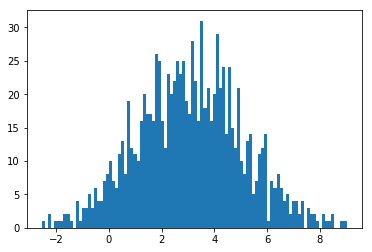

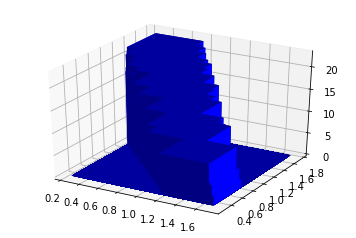

In [6]:
smpl = normal(3,2,1000)
plt.figure()
plt.hist(smpl, bins=100)

s = dirichlet([1,2],1000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(s[:,0], s[:,1], bins=100)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

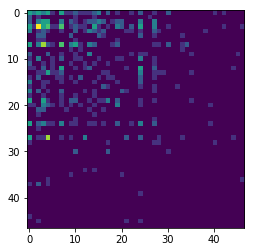

In [7]:
def DirichletNet(ap,N):
    """Dirchlet Network Distribution, N is size of adj matrix"""
    _,p,_ = crp(ap=ap,num=1000)
    # (truncated) support size
    sz = len(p)
    sr = choice(sz,size=(N,2),replace=True,p=p)
    adj = np.zeros((sz,sz), dtype=int)
    for s,r in sr:
        adj[s,r] += 1
    return adj

adj = DirichletNet(10,500)
plt.figure()
plt.imshow(adj)
plt.show()

## Hierachical Dirichlet

54 54


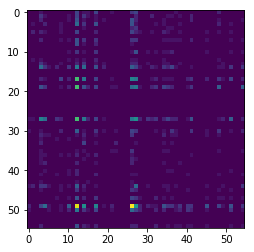

In [ ]:
def DPCat(p, ap=10, num=1000):
    """Dirichlet process with base Categorical distribution p"""
    
    # (truncated) support according to p
    sz = len(p)
    
    size = dict()
    #first value drawn from p
    nval = choice(sz,p=p)
    size[nval] = 1
    
    for n in range(1,num):
        # compute categorical distribution for customer assignment
        cat = []
        denom = n+ap #n+1-1+ap
        
        key = []
        for k,v in size.items():
            key.append(k)
            cat.append(v / denom)
            
        # new table probability
        cat.append(ap / denom)
        assert(abs(sum(cat) - 1) < 0.0001)
        
        # draw from past values or draw new value from P?
        table = choice(len(cat), p=cat)
        
        # new value from G
        if table == len(cat) - 1:
            nval = choice(sz,p=p)
            if nval in size:
                size[nval] += 1
            else:
                size[nval] = 1
            
        # past values
        else:
            size[key[table]] += 1
           
    # convert dict to support and prob
    return np.array(list(size.keys())), np.array([s/num for s in size.values()])

def AsDirichletNet(gamma, tau,N=500):
    """Asymmetric Dirichlet Network Distribution having a hierachical process"""
    
    _,P,_ = crp(ap=gamma, num=100)
    
    As, Ap = DPCat(P, tau, num=100)
    s = As[choice(len(As), size=N, p=Ap)]
    
    Bs, Bp = DPCat(P, tau, num=100)
    r = Bs[choice(len(Bs), size=N, p=Bp)]
    
    #max of support
    sz0 = max(As)
    sz1 = max(Bs)
    print(max(As), max(Bs))
    
    adj = np.zeros((sz0+1,sz1+1), dtype=int)
    for ss,rr in zip(s,r):
        adj[ss, rr] +=1  
        
    return adj 
adj = AsDirichletNet(50,50,1000)
plt.imshow(adj)
plt.show()

In [6]:
# Mixture od Dirichlet network

inlinks = dict()
outlinks = dict()
H = StickBreakingProcess(alpha=1)
D = StickBreakingProcess(alpha=1)

n = 500 # number of edges
edges = np.zeros((n,2), dtype=int)

cs = sorted(D.sample(500))

for i,c in enumerate(cs):
    if c not in inlinks:
        inlinks[c] = DirichletProcess(H,alpha=1)
    u = inlinks[c].sample()
    
    if d not in outlinks:
        outlinks[c] = DirichletProcess(H,alpha=1)
    v = outlinks[c].sample()
   
    edges[i,:] = [u,v]
    
sz0 = max(edges[:,0])
sz1 = max(edges[:,1])

adj = np.zeros((sz0+1,sz1+1), dtype=int)
for i in range(n):
    adj[u,v] += 1

plt.imshow(adj)
plt.show()
    

TypeError: __init__() got multiple values for argument 'alpha'

In [5]:
# Mixture of dirichlet network
from Process import StickBreakingProcess
def MixDirichletNet(gamma,tau,alpha,N=100):
    
    dp = StickBreakingProcess(alpha=alpha)
    cs = dp.sample(N)
    
    no_clus = max(cs) + 1
    
    _,P,_ = crp(ap=gamma, num=100)

    A = []
    B = []
    for i in range(no_clus):
        
        As, Ap = DPCat(P, tau, num=100)
#         s = As[choice(len(As), size=N, p=Ap)]
        A.append([As,Ap])

        Bs, Bp = DPCat(P, tau, num=100)
#         r = Bs[choice(len(Bs), size=N, p=Bp)]
        B.append([Bs,Bp])

    sn = []
    rn = []
    for c in cs:
        As = A[c][0]
        Ap = A[c][1]
        sn.append (As[choice(len(As), p=Ap)])
        
        Bs = B[c][0]
        Bp = B[c][1]
        rn.append (Bs[choice(len(Bs), p=Bp)])
        
    sz0 = max(sn)+1
    sz1 = max(rn)+1
    adj = np.zeros((sz0,sz1), dtype=int)
    for s,r in zip(sn,rn):
        adj[s, r] +=1  

        return adj 
    
adj = MixDirichletNet(20,5,5,1000)



NameError: name 'crp' is not defined

4.879776947176159 0.009900990099009901


/home/drproduck/miniconda3/envs/sage/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


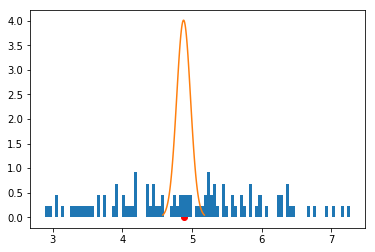

In [10]:
# mu ~ Normal(mu_0, simga_0)
# x ~ Normal(mu, sigma)

import matplotlib.mlab as mlab
def gaussian_mean_prior(X, sg, mu_0, sg_0):
    N = len(X)
    mu_h = sg*mu_0/(N*sg_0+sg) + sg_0*np.sum(X)/(N*sg_0+sg)
    sg_h = 1 / (N/sg+1/sg_0)
    return mu_h, sg_h

X = normal(5,1,100)
mu_h,sg_h = gaussian_mean_prior(X,1,1,1)

plt.figure()
plt.hist(X,bins=100,density=True)
print(mu_h, sg_h)
plt.scatter(mu_h,0,c='red')
sigma = math.sqrt(sg_h)
x = np.linspace(mu_h - 3*sigma, mu_h + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu_h, sigma))
plt.show()

In [54]:
a = [1] + [2]
from numpy.random import normal
a = normal(1,1,100).flatten() + normal(2,1,100).flatten()
print(len(a))

a = [1,2,1,2,100]
print(a == 1)



100
False
